## Mini-Projeto 2 - Análise Exploratória em Conjunto de Dados do Kaggle

## Análise 4

In [1]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")
%matplotlib inline

In [2]:
# Dataset
clean_data_path = "dataset/autos.csv"
df = pd.read_csv(clean_data_path,encoding="latin-1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313687 entries, 0 to 313686
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          313687 non-null  object
 1   name                 313687 non-null  object
 2   seller               313687 non-null  object
 3   offerType            313687 non-null  object
 4   price                313687 non-null  int64 
 5   abtest               313687 non-null  object
 6   vehicleType          313687 non-null  object
 7   yearOfRegistration   313687 non-null  int64 
 8   gearbox              313687 non-null  object
 9   powerPS              313687 non-null  int64 
 10  model                313687 non-null  object
 11  kilometer            313687 non-null  int64 
 12  monthOfRegistration  313687 non-null  object
 13  fuelType             313498 non-null  object
 14  brand                313687 non-null  object
 15  notRepairedDamage    313687 non-nu

In [3]:
# Calcule a média de preço por marca e por veículo
df1= df [["brand","vehicleType", "price"]]
df1= df1.groupby(['brand',"vehicleType"]).mean()
df1

price
brand      vehicleType              
alfa_romeo Other          669.805556
           andere         962.500000
           cabrio        7035.727778
           coupe         5265.458874
           kleinwagen    1867.865248
...                              ...
volvo      coupe         5502.100000
           kleinwagen    1475.000000
           kombi         2789.709828
           limousine     3768.010084
           suv          14081.237918

[333 rows x 1 columns]

## Preço médio de um veículo por marca, bem como tipo de veículo

In [4]:
#Preparando os dados
forheat = pd.DataFrame()
for a in list(df["brand"].unique()):
    for b in list(df["vehicleType"].unique()):
        c = df[(df["brand"] == a) & (df["vehicleType"] == b)]["price"].mean()
        forheat = pd.concat([forheat, pd.DataFrame({'brand':a , 'vehicleType':b , 'avgPrice':c}, index=[0])])
forheat = forheat.reset_index()
del forheat["index"]
forheat["avgPrice"].fillna(0,inplace=True)
forheat["avgPrice"].isnull().value_counts()
forheat["avgPrice"] = forheat["avgPrice"].astype(int)
forheat.head()

,brand,vehicleType,avgPrice
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743


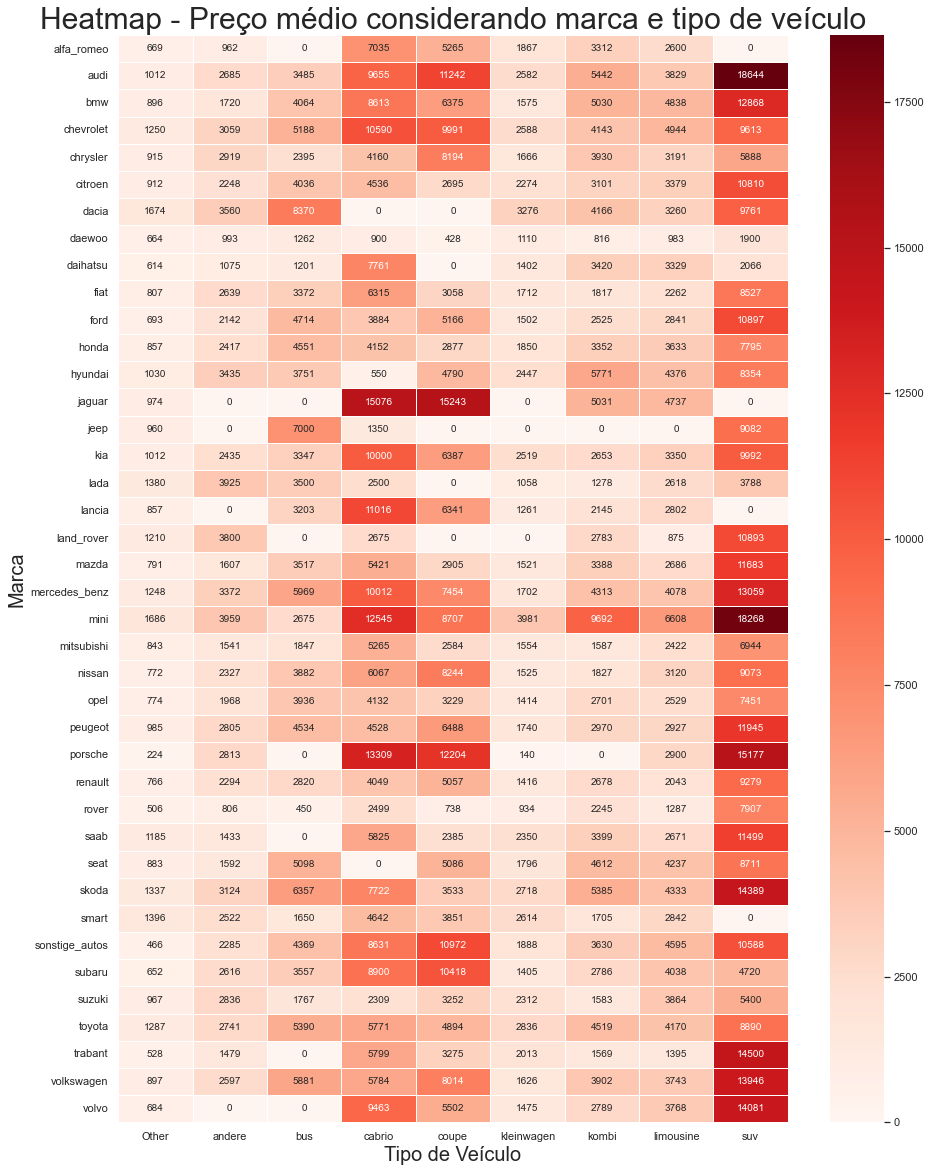

In [5]:
# Crie um Heatmap com Preço médio de um veículo por marca, bem como tipo de veículo
heat = forheat.pivot("brand","vehicleType", "avgPrice")
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(heat,linewidths=1,cmap="Reds",annot=True, ax=ax, fmt="d")
ax.set_title("Heatmap - Preço médio considerando marca e tipo de veículo",fontdict={'size':30})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':20})
ax.yaxis.set_label_text("Marca",fontdict= {'size':20})
plt.show()

# Fim